# Tapşırıq 13.

## Mənə elə gəlir ki, əksər müştərilərimiz daha ucuz məhsullar aldıqda bonus kartdan istifadəyə elə də maraqlı deyillər. Zəhmət olmasa, məhsul qiyməti ilə bonus kartı arasında hər hansı korrelyasiya olub-olmadığını mənə bildirin.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("esas_mehsullar.csv")
df = data.copy()
df.head()

,column_a,satish_kodu,mehsul_kodu,mehsul_ad,mehsul_kateqoriya,mehsul_qiymet,satish_tarixi,endirim_kompaniya,bonus_kart,magaza_ad,magaza_lat,magaza_long,magaza_location
0,0,577571,3334,GONDOL SIMPLE LABABO VE BUZLUK HALISI G61*50,Məişət məhsulları,3.68,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
1,1,577571,4674,TAXTA BICAQ 3232,Qab-qacaq,2.25,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
2,2,577571,8388,VITA 1LT ANANAS SIRESI,Meyvə Şirələri,2.50,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
3,3,577571,6017,GILAN BAGDAN 1LT SARI GAVALI KOMPOTU,Kompotlar,1.45,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)
4,4,577571,8297,OSRAM SUPERSTAR LAMPA 64544A ECO 57W E27,Məişət məhsulları,2.92,2019-07-19T12:29:00,Sərin Yay günləri,True,Zabrat,40.485561,49.946741,POINT(49.9467409 40.4855613)


In [3]:
# qiymət və bonus kart sütunu

df = df[["mehsul_qiymet","bonus_kart"]].copy()

In [4]:
df

,mehsul_qiymet,bonus_kart
0,3.68,True
1,2.25,True
2,2.50,True
3,1.45,True
4,2.92,True
...,...,...
438821,8.90,True
438822,3.60,False
438823,1.90,False
438824,8.50,False


In [5]:
df.isnull().sum()

mehsul_qiymet    771
bonus_kart         0
dtype: int64

In [6]:
# çatışmayan verilənləri silmək

df.dropna(inplace = True)

In [7]:
df

,mehsul_qiymet,bonus_kart
0,3.68,True
1,2.25,True
2,2.50,True
3,1.45,True
4,2.92,True
...,...,...
438821,8.90,True
438822,3.60,False
438823,1.90,False
438824,8.50,False


In [8]:
df["bonus_kart"] = df["bonus_kart"].astype("object")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 438055 entries, 0 to 438825
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   mehsul_qiymet  438055 non-null  float64
 1   bonus_kart     438055 non-null  object 
dtypes: float64(1), object(1)
memory usage: 10.0+ MB


In [10]:
# one hot encoding

df = pd.get_dummies(df)

In [11]:
df

,mehsul_qiymet,bonus_kart_False,bonus_kart_True
0,3.68,0,1
1,2.25,0,1
2,2.50,0,1
3,1.45,0,1
4,2.92,0,1
...,...,...,...
438821,8.90,0,1
438822,3.60,1,0
438823,1.90,1,0
438824,8.50,1,0


In [12]:
df.rename(columns = {"bonus_kart_False" : "False", "bonus_kart_True" : "True"}, inplace = True)

In [13]:
df

,mehsul_qiymet,False,True
0,3.68,0,1
1,2.25,0,1
2,2.50,0,1
3,1.45,0,1
4,2.92,0,1
...,...,...,...
438821,8.90,0,1
438822,3.60,1,0
438823,1.90,1,0
438824,8.50,1,0


In [14]:
# məhsul qiymətləri ilə bonus kartlar arasındakı korrelyasiya

df.corr()

,mehsul_qiymet,False,True
mehsul_qiymet,1.000000,-0.002914,0.002914
False,-0.002914,1.000000,-1.000000
True,0.002914,-1.000000,1.000000


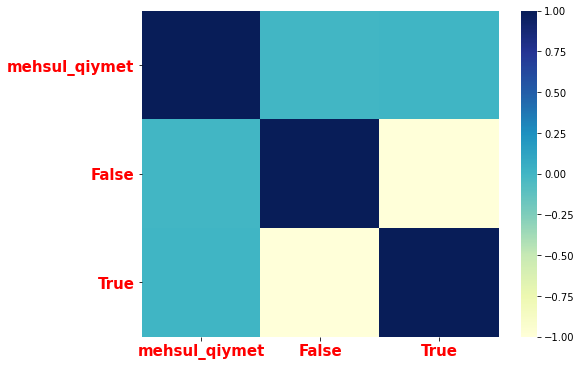

In [15]:
# korrelyasiya qrafiki

plt.figure(figsize = (8,6))
plt.xticks(fontsize = 15, color = "r", fontweight = "bold")
plt.yticks(fontsize = 15, color = "r", fontweight = "bold")
sns.heatmap(df.corr(),cmap = "YlGnBu");

## Nəticə: Zəif korrelyasiya